In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline
from torch.utils.data import Dataset, DataLoader
import torch
import torchvision

import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Generate dataset

In [2]:
y = np.random.randint(0,10,5000)
idx= []
for i in range(10):
    print(i,sum(y==i))
    idx.append(y==i)

0 474
1 477
2 489
3 495
4 507
5 538
6 495
7 524
8 499
9 502


In [3]:
x = np.zeros((5000,2))
x1 = np.zeros((5000,2))

In [4]:
x[idx[0],:] = np.random.multivariate_normal(mean = [2,7],cov=[[0.1,0],[0,0.1]],size=sum(idx[0]))
x1[idx[0],:] = np.random.multivariate_normal(mean = [0,-10],cov=[[0.1,0],[0,0.1]],size=sum(idx[0]))

x[idx[1],:] = np.random.multivariate_normal(mean = [-15,-7],cov=[[0.1,0],[0,0.1]],size=sum(idx[1]))
x1[idx[1],:] = np.random.multivariate_normal(mean = [-5,15],cov=[[0.1,0],[0,0.1]],size=sum(idx[1]))

x[idx[2],:] = np.random.multivariate_normal(mean = [4,-2],cov=[[0.1,0],[0,0.1]],size=sum(idx[2]))
x1[idx[2],:] = np.random.multivariate_normal(mean = [-10,0],cov=[[0.1,0],[0,0.1]],size=sum(idx[2]))


x[idx[3],:] = np.random.multivariate_normal(mean = [-5,0],cov=[[0.1,0],[0,0.1]],size=sum(idx[3]))
x1[idx[3],:] = np.random.multivariate_normal(mean = [-20,10],cov=[[0.1,0],[0,0.1]],size=sum(idx[3]))

x[idx[4],:] = np.random.multivariate_normal(mean =[-8,10] ,cov=[[0.1,0],[0,0.1]],size=sum(idx[4]))
x1[idx[4],:] = np.random.multivariate_normal(mean = [10,20],cov=[[0.1,0],[0,0.1]],size=sum(idx[4]))


x[idx[5],:] = np.random.multivariate_normal(mean = [-15,6],cov=[[0.1,0],[0,0.1]],size=sum(idx[5]))
x1[idx[5],:] = np.random.multivariate_normal(mean = [0,2],cov=[[0.1,0],[0,0.1]],size=sum(idx[5]))

x[idx[6],:] = np.random.multivariate_normal(mean = [2,-18],cov=[[0.1,0],[0,0.1]],size=sum(idx[6]))
x1[idx[6],:] = np.random.multivariate_normal(mean = [7,7],cov=[[0.1,0],[0,0.1]],size=sum(idx[6]))

x[idx[7],:] = np.random.multivariate_normal(mean = [10,-10],cov=[[0.1,0],[0,0.1]],size=sum(idx[7]))
x1[idx[7],:] = np.random.multivariate_normal(mean = [-8,-11],cov=[[0.1,0],[0,0.1]],size=sum(idx[7]))

x[idx[8],:] = np.random.multivariate_normal(mean = [-10,-15],cov=[[0.1,0],[0,0.1]],size=sum(idx[8]))
x1[idx[8],:] = np.random.multivariate_normal(mean = [10,-2],cov=[[0.1,0],[0,0.1]],size=sum(idx[8]))

x[idx[9],:] = np.random.multivariate_normal(mean = [15,8],cov=[[0.1,0],[0,0.1]],size=sum(idx[9]))
x1[idx[9],:] = np.random.multivariate_normal(mean = [2,20],cov=[[0.1,0],[0,0.1]],size=sum(idx[9]))

In [5]:
x,y = np.concatenate((x,x1),axis=0),np.concatenate((y,y),axis=0)
x.shape,y.shape

((10000, 2), (10000,))

In [6]:
# y = np.random.randint(0,10,1000)
idx= []
for i in range(10):
    #print(i,sum(y==i))
    idx.append(y==i)

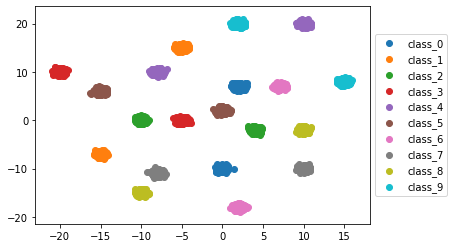

In [7]:
for i in range(10):
    plt.scatter(x[idx[i],0],x[idx[i],1],label="class_"+str(i))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [8]:
foreground_classes = {'class_0','class_1', 'class_2'}

background_classes = {'class_3','class_4', 'class_5', 'class_6','class_7', 'class_8', 'class_9'}

In [9]:
fg_class  = np.random.randint(0,3)
fg_idx = np.random.randint(0,9)

a = []
for i in range(9):
    if i == fg_idx:
        b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
        a.append(x[b])
        print("foreground "+str(fg_class)+" present at " + str(fg_idx))
    else:
        bg_class = np.random.randint(3,10)
        b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
        a.append(x[b])
        print("background "+str(bg_class)+" present at " + str(i))
a = np.concatenate(a,axis=0)
print(a.shape)

print(fg_class , fg_idx)

background 8 present at 0
background 5 present at 1
background 4 present at 2
background 8 present at 3
background 5 present at 4
background 4 present at 5
background 8 present at 6
foreground 1 present at 7
background 8 present at 8
(9, 2)
1 7


In [10]:
a.shape

(9, 2)

In [11]:
np.reshape(a,(18,1))

array([[ -9.32898652],
       [-14.84304832],
       [  0.09856531],
       [  2.22924062],
       [ 10.17243528],
       [ 20.1558664 ],
       [ -9.98233812],
       [-14.84333409],
       [-14.79874698],
       [  5.63831349],
       [  9.97698234],
       [ 19.24692785],
       [  9.78002733],
       [ -1.3867829 ],
       [-14.90363904],
       [ -6.74641042],
       [-10.18696583],
       [-14.73635258]])

In [12]:
a=np.reshape(a,(3,6))

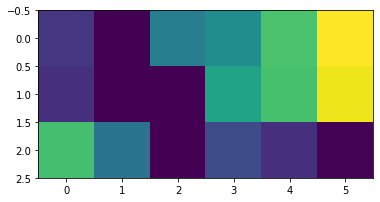

In [13]:
plt.imshow(a)

In [14]:
desired_num = 3000
mosaic_list =[]
mosaic_label = []
fore_idx=[]
for j in range(desired_num):
    fg_class  = np.random.randint(0,3)
    fg_idx = np.random.randint(0,9)
    a = []
    for i in range(9):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(3,10)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list.append(np.reshape(a,(18,1)))
    mosaic_label.append(fg_class)
    fore_idx.append(fg_idx)

In [15]:
mosaic_list = np.concatenate(mosaic_list,axis=1).T
print(mosaic_list)

[[-19.99453888   9.95116585   4.13709546 ... -10.30916397 -19.75765875
    9.67703472]
 [-10.30055602 -14.4197779  -14.15565394 ...  -7.11533812   2.00386087
  -18.42459487]
 [  9.89704361  -2.76465214   7.02620654 ...  -2.0951741   10.11578613
   20.06057664]
 ...
 [-10.53623345 -14.80973458 -15.37820703 ...  20.0433087  -20.35090553
   10.47059405]
 [  9.7530642   19.95274757   7.19150837 ...  -2.04425561 -19.53576645
   10.09522375]
 [  0.04539778   1.99658701   9.98238416 ...   1.69950616   7.54053351
    7.0247956 ]]


In [16]:
print(np.shape(mosaic_label))
print(np.shape(fore_idx))

(3000,)
(3000,)


In [17]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list, mosaic_label, fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list
    self.label = mosaic_label
    self.fore_idx = fore_idx

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]

batch = 250
msd = MosaicDataset(mosaic_list, mosaic_label , fore_idx)
train_loader = DataLoader( msd,batch_size= batch ,shuffle=True)

In [18]:
class Wherenet(nn.Module):
    def __init__(self):
        super(Wherenet,self).__init__()
        self.linear1 = nn.Linear(2,16)
        self.linear2 = nn.Linear(16,32)
        self.linear3 = nn.Linear(32,1)
    def forward(self,z):
        x = torch.zeros([batch,9],dtype=torch.float64)
        y = torch.zeros([batch,2], dtype=torch.float64)
        #x,y = x.to("cuda"),y.to("cuda")
        for i in range(9):
            x[:,i] = self.helper(z[:,2*i:2*i+2])[:,0]
            #print(k[:,0].shape,x[:,i].shape)
        x = F.softmax(x,dim=1)   # alphas
        x1 = x[:,0]
        for i in range(9):
            x1 = x[:,i]          
            #print()
            y = y+torch.mul(x1[:,None],z[:,2*i:2*i+2])
        return y , x 

    
    def helper(self,x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

    

In [19]:
trainiter = iter(train_loader)
input1,labels1,index1 = trainiter.next()



In [20]:
where = Wherenet().double()
where = where
out_where,alphas = where(input1)
out_where.shape,alphas.shape

(torch.Size([250, 2]), torch.Size([250, 9]))

In [21]:
class Whatnet(nn.Module):
    def __init__(self):
        super(Whatnet,self).__init__()
        self.linear1 = nn.Linear(2,8)
        self.linear2 = nn.Linear(8,16)
        self.linear3 = nn.Linear(16,3)
    def forward(self,x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [22]:
what = Whatnet().double()
what(out_where)

tensor([[-0.3109, -0.5094, -0.4142],
        [-0.2697, -0.1586, -0.0214],
        [-1.1407, -0.2651, -1.0970],
        [-1.5096, -0.3739, -1.5407],
        [-0.2891, -0.1455, -0.0122],
        [-0.6400, -0.1369, -0.5691],
        [-0.2837, -0.2418, -0.0626],
        [-0.2730, -0.1499,  0.0053],
        [-1.1002, -0.2625, -1.0444],
        [-0.2597, -0.1579, -0.0228],
        [-0.2827, -0.1874, -0.0707],
        [-0.6347, -0.1906, -0.4722],
        [-0.8558, -0.2656, -0.6944],
        [-0.2853, -0.2872, -0.1648],
        [-0.3261, -0.4569, -0.1539],
        [-0.3413, -0.1559, -0.0871],
        [-0.2868, -0.1972, -0.2515],
        [-0.9409, -0.2007, -0.8974],
        [-0.2966, -0.1521, -0.0445],
        [-0.3155, -0.3916, -0.1064],
        [-0.3873, -0.2083, -0.1541],
        [-1.0100, -0.1365, -1.1102],
        [-0.9719, -0.3614, -0.8084],
        [-0.3956, -0.7638, -0.3120],
        [-0.2756, -0.1555,  0.0032],
        [-0.3517, -0.6332, -0.2515],
        [-0.3272, -0.1526, -0.0709],
 

In [23]:
test_data_required = 1000
mosaic_list_test =[]
mosaic_label_test = []
fore_idx_test=[]
for j in range(test_data_required):
    fg_class  = np.random.randint(0,3)
    fg_idx = np.random.randint(0,9)
    a = []
    for i in range(9):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(3,10)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list_test.append(np.reshape(a,(18,1)))
    mosaic_label_test.append(fg_class)
    fore_idx_test.append(fg_idx)

In [24]:
mosaic_list_test = np.concatenate(mosaic_list_test,axis=1).T
print(mosaic_list_test.shape)

(1000, 18)


In [25]:
test_data = MosaicDataset(mosaic_list_test,mosaic_label_test,fore_idx_test)
test_loader = DataLoader( test_data,batch_size= batch ,shuffle=False)

In [26]:

focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

col1=[]
col2=[]
col3=[]
col4=[]
col5=[]
col6=[]
col7=[]
col8=[]
col9=[]
col10=[]
col11=[]
col12=[]
col13=[]

criterion = nn.CrossEntropyLoss()
optimizer_where = optim.SGD(where.parameters(), lr=0.01, momentum=0.9)
optimizer_what = optim.SGD(what.parameters(), lr=0.01, momentum=0.9)

nos_epochs = 150

train_loss=[]
test_loss =[]
train_acc = []
test_acc = []
for epoch in range(nos_epochs):  # loop over the dataset multiple times

    focus_true_pred_true =0
    focus_false_pred_true =0
    focus_true_pred_false =0
    focus_false_pred_false =0

    argmax_more_than_half = 0
    argmax_less_than_half =0

    running_loss = 0.0
    cnt=0

    iteration = desired_num // batch

    #training data set

    for i, data in  enumerate(train_loader):
        inputs , labels , fore_idx = data
        #inputs,labels,fore_idx = inputs.to(device),labels.to(device),fore_idx.to(device)
        # zero the parameter gradients

        optimizer_what.zero_grad()
        optimizer_where.zero_grad()
        
        
        avg_inp,alphas = where(inputs)
        
        outputs = what(avg_inp)
        
        _, predicted = torch.max(outputs.data, 1)
        
        loss = criterion(outputs, labels) 
        loss.backward() 
        
        optimizer_what.step()
        optimizer_where.step() 
        

        running_loss += loss.item()
        if cnt % 6 == 5:    # print every 6 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / 6))
            running_loss = 0.0
        cnt=cnt+1
    
        if epoch % 5 == 4:
            for j in range (batch):
                focus = torch.argmax(alphas[j])

                if(alphas[j][focus] >= 0.5):
                    argmax_more_than_half +=1
                else:
                    argmax_less_than_half +=1

                if(focus == fore_idx[j] and predicted[j] == labels[j]):
                    focus_true_pred_true += 1

                elif(focus != fore_idx[j] and predicted[j] == labels[j]):
                    focus_false_pred_true +=1

                elif(focus == fore_idx[j] and predicted[j] != labels[j]):
                    focus_true_pred_false +=1

                elif(focus != fore_idx[j] and predicted[j] != labels[j]):
                    focus_false_pred_false +=1

    if epoch % 5 == 4:
        col1.append(epoch)
        col2.append(argmax_more_than_half)
        col3.append(argmax_less_than_half)
        col4.append(focus_true_pred_true)
        col5.append(focus_false_pred_true)
        col6.append(focus_true_pred_false)
        col7.append(focus_false_pred_false)

    #************************************************************************
        #testing data set  
        with torch.no_grad():
            focus_true_pred_true =0
            focus_false_pred_true =0
            focus_true_pred_false =0
            focus_false_pred_false =0

            argmax_more_than_half = 0
            argmax_less_than_half =0
            for data in test_loader:
                inputs, labels , fore_idx = data
                #inputs,labels,fore_idx = inputs.to(device),labels.to(device),fore_idx.to(device) 
#                 print(inputs.shtorch.save(where.state_dict(),"model_epoch"+str(epoch)+".pt")ape,labels.shape)
                avg_inp,alphas = where(inputs)
                outputs = what(avg_inp)
                _, predicted = torch.max(outputs.data, 1)

                for j in range (batch):
                    focus = torch.argmax(alphas[j])

                    if(alphas[j][focus] >= 0.5):
                        argmax_more_than_half +=1
                    else:
                        argmax_less_than_half +=1

                    if(focus == fore_idx[j] and predicted[j] == labels[j]):
                        focus_true_pred_true += 1

                    elif(focus != fore_idx[j] and predicted[j] == labels[j]):
                        focus_false_pred_true +=1

                    elif(focus == fore_idx[j] and predicted[j] != labels[j]):
                        focus_true_pred_false +=1

                    elif(focus != fore_idx[j] and predicted[j] != labels[j]):
                        focus_false_pred_false +=1

        col8.append(argmax_more_than_half)
        col9.append(argmax_less_than_half)
        col10.append(focus_true_pred_true)
        col11.append(focus_false_pred_true)
        col12.append(focus_true_pred_false)
        col13.append(focus_false_pred_false)
        torch.save(where.state_dict(),"where_model_epoch"+str(epoch)+".pt")
        torch.save(what.state_dict(),"what_model_epoch"+str(epoch)+".pt")
    
print('Finished Training')
torch.save(where.state_dict(),"where_model_epoch"+str(nos_epochs)+".pt")
torch.save(what.state_dict(),"what_model_epoch"+str(epoch)+".pt")


[1,     6] loss: 1.107
[1,    12] loss: 1.103
[2,     6] loss: 1.098
[2,    12] loss: 1.098
[3,     6] loss: 1.094
[3,    12] loss: 1.093
[4,     6] loss: 1.090
[4,    12] loss: 1.088
[5,     6] loss: 1.085
[5,    12] loss: 1.080
[6,     6] loss: 1.070
[6,    12] loss: 1.064
[7,     6] loss: 1.053
[7,    12] loss: 1.005
[8,     6] loss: 0.981
[8,    12] loss: 0.952
[9,     6] loss: 0.932
[9,    12] loss: 0.912
[10,     6] loss: 0.909
[10,    12] loss: 0.887
[11,     6] loss: 0.878
[11,    12] loss: 0.876
[12,     6] loss: 0.853
[12,    12] loss: 0.872
[13,     6] loss: 0.840
[13,    12] loss: 0.848
[14,     6] loss: 0.849
[14,    12] loss: 0.800
[15,     6] loss: 0.808
[15,    12] loss: 0.789
[16,     6] loss: 0.796
[16,    12] loss: 0.750
[17,     6] loss: 0.771
[17,    12] loss: 0.725
[18,     6] loss: 0.741
[18,    12] loss: 0.704
[19,     6] loss: 0.693
[19,    12] loss: 0.698
[20,     6] loss: 0.696
[20,    12] loss: 0.648
[21,     6] loss: 0.640
[21,    12] loss: 0.639
[22,     6

In [27]:
columns = ["epochs", "argmax > 0.5" ,"argmax < 0.5", "focus_true_pred_true", "focus_false_pred_true", "focus_true_pred_false", "focus_false_pred_false" ]
df_train = pd.DataFrame()
df_test = pd.DataFrame()
df_train[columns[0]] = col1
df_train[columns[1]] = col2
df_train[columns[2]] = col3
df_train[columns[3]] = col4
df_train[columns[4]] = col5
df_train[columns[5]] = col6
df_train[columns[6]] = col7

df_test[columns[0]] = col1
df_test[columns[1]] = col8
df_test[columns[2]] = col9
df_test[columns[3]] = col10
df_test[columns[4]] = col11
df_test[columns[5]] = col12
df_test[columns[6]] = col13

In [28]:
df_train

,epochs,argmax > 0.5,argmax < 0.5,focus_true_pred_true,focus_false_pred_true,focus_true_pred_false,focus_false_pred_false
0,4,0,3000,175,1008,303,1514
1,9,967,2033,916,795,167,1122
2,14,1537,1463,1104,800,38,1058
3,19,1840,1160,1190,923,66,821
4,24,1805,1195,1519,791,106,584
5,29,2162,838,1930,703,92,275
6,34,2237,763,2327,628,7,38
7,39,2665,335,1474,798,43,685
8,44,2894,106,1743,571,13,673
9,49,2671,329,2079,862,12,47


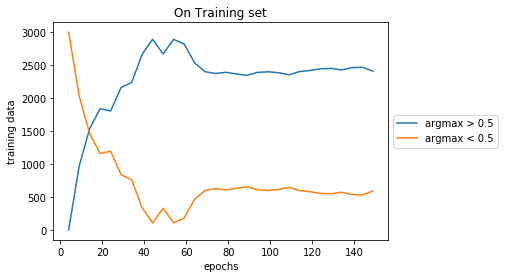

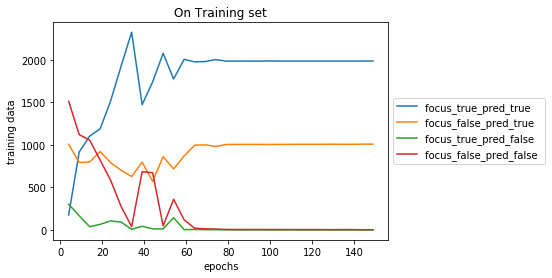

In [29]:
plt.plot(col1,col2, label='argmax > 0.5')
plt.plot(col1,col3, label='argmax < 0.5')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("training data")
plt.title("On Training set")
plt.show()

plt.plot(col1,col4, label ="focus_true_pred_true ")
plt.plot(col1,col5, label ="focus_false_pred_true ")
plt.plot(col1,col6, label ="focus_true_pred_false ")
plt.plot(col1,col7, label ="focus_false_pred_false ")
plt.title("On Training set")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("training data")
plt.show()

In [30]:
df_test

,epochs,argmax > 0.5,argmax < 0.5,focus_true_pred_true,focus_false_pred_true,focus_true_pred_false,focus_false_pred_false
0,4,0,1000,151,219,223,407
1,9,349,651,335,241,53,371
2,14,492,508,392,265,23,320
3,19,609,391,420,308,12,260
4,24,587,413,525,264,60,151
5,29,754,246,746,193,24,37
6,34,766,234,803,185,2,10
7,39,888,112,636,169,5,190
8,44,966,34,585,217,7,191
9,49,859,141,696,301,2,1


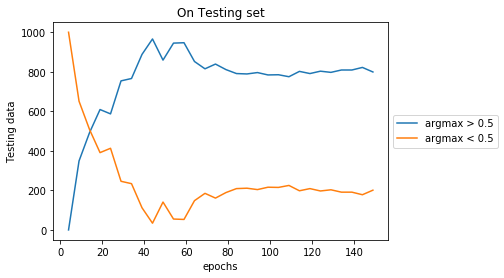

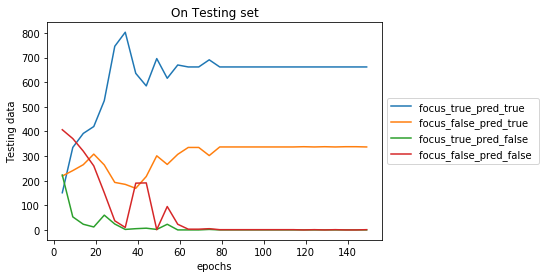

In [31]:
plt.plot(col1,col8, label='argmax > 0.5')
plt.plot(col1,col9, label='argmax < 0.5')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("Testing data")
plt.title("On Testing set")
plt.show()

plt.plot(col1,col10, label ="focus_true_pred_true ")
plt.plot(col1,col11, label ="focus_false_pred_true ")
plt.plot(col1,col12, label ="focus_true_pred_false ")
plt.plot(col1,col13, label ="focus_false_pred_false ")
plt.title("On Testing set")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("Testing data")
plt.show()

In [32]:
print(x[0])

[14.88589399  7.76800605]


In [33]:
for i in range(9):
    print(x[0,2*i:2*i+2])

[14.88589399  7.76800605]
[]
[]
[]
[]
[]
[]
[]
[]


In [34]:
idx[0]

array([False, False,  True, ..., False, False, False])

In [35]:
idx[0][:250]

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,